# **Genomes and Genetics Disorder**

<img src="img\Exp_transmission_ang.jpg" style="width: 550px;" />

### **Types of Genetic Diseases :**
#### 1.Single Gene Disorder
#### 2.Multifactorial Disorder 
#### 3.Mitochondrial Disorder 
#### 4.Chromosomal Disorder 
#### 5.Acquired Somatic Disorder 


In [1385]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [1386]:
df_train=pd.read_csv("dataset/train.csv")
predict_df=pd.read_csv("dataset/test.csv")

print("train shape: ",df_train.shape)
print("test shape: ",predict_df.shape)

train shape:  (22083, 45)
test shape:  (9465, 43)


In [1387]:
df_train.isna().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [1388]:
#The original copy of test.csv contain wrong value ="-99" 
predict_df.replace({-99,"-99"},np.nan,inplace=True)

In [1389]:
# Remove the the rows with missing target features where it's null 
# _df=df.loc[(df['Genetic Disorder'].isna()) | (df['Disorder Subclass'].isna())]
# predict_df=predict_df.append(_df,ignore_index=True)
# df.dropna(subset=["Genetic Disorder","Disorder Subclass"],how='any',inplace=True)
df = df_train.dropna(subset=["Genetic Disorder","Disorder Subclass"],how='any')

_df = df_train[~df_train.index.isin(df.index)]
predict_df=predict_df.append(_df,ignore_index=True)
df = df.reset_index(drop=True)
predict_df = predict_df.reset_index(drop=True)
print("null targets shape: ",_df.shape)
print("train shape: ",df.shape)

# df[df['Genetic Disorder'].isna()]

null targets shape:  (4036, 45)
train shape:  (18047, 45)


In [1390]:
df[-2:]

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
18045,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
18046,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [1391]:
predict_df[:2]

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,Multiple,NaN,slightly abnormal,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0,NaN,NaN


In [1392]:
df=df.append(predict_df,ignore_index=True)
df[18045:18050]

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
18045,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
18046,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
18047,PID0x4175,6.0,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,Multiple,NaN,slightly abnormal,1.0,1.0,1.0,1.0,1.0,NaN,NaN
18048,PID0x21f5,10.0,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Multiple,8.179584,normal,0.0,0.0,0.0,1.0,0.0,NaN,NaN
18049,PID0x49b8,5.0,No,NaN,No,No,4.876204,James,NaN,Danield,...,Singular,NaN,slightly abnormal,0.0,0.0,1.0,1.0,0.0,NaN,NaN


## Data Perperation 

In [1393]:
# Replace spaces in columns names
df.columns = df.columns.str.replace(' ', '_')

In [1394]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_Age,30121.0,6.995418,4.325345,0.000000,3.000000,7.000000,11.000000,14.000000
Blood_cell_count_(mcL),31548.0,4.899272,0.199510,4.092727,4.763948,4.899315,5.033619,5.676184
Mother's_age,25512.0,34.544646,9.845861,18.000000,26.000000,35.000000,43.000000,51.000000
Father's_age,25562.0,41.920233,13.037442,20.000000,30.000000,42.000000,53.000000,64.000000
Test_1,27301.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_2,27315.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_3,27302.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test_4,27326.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test_5,27287.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No._of_previous_abortion,27290.0,2.006852,1.411019,0.000000,1.000000,2.000000,3.000000,4.000000


In [1395]:
# Split Features/target 
features_df=df.iloc[:,:-2]
print("Features columns: ",features_df.columns)
targets_df=df.iloc[:18047,-2:]
print("Target columns: ",targets_df.columns)

Features columns:  Index(['Patient_Id', 'Patient_Age', 'Genes_in_mother's_side',
       'Inherited_from_father', 'Maternal_gene', 'Paternal_gene',
       'Blood_cell_count_(mcL)', 'Patient_First_Name', 'Family_Name',
       'Father's_name', 'Mother's_age', 'Father's_age', 'Institute_Name',
       'Location_of_Institute', 'Status', 'Respiratory_Rate_(breaths/min)',
       'Heart_Rate_(rates/min', 'Test_1', 'Test_2', 'Test_3', 'Test_4',
       'Test_5', 'Parental_consent', 'Follow-up', 'Gender', 'Birth_asphyxia',
       'Autopsy_shows_birth_defect_(if_applicable)', 'Place_of_birth',
       'Folic_acid_details_(peri-conceptional)',
       'H/O_serious_maternal_illness', 'H/O_radiation_exposure_(x-ray)',
       'H/O_substance_abuse', 'Assisted_conception_IVF/ART',
       'History_of_anomalies_in_previous_pregnancies',
       'No._of_previous_abortion', 'Birth_defects',
       'White_Blood_cell_count_(thousand_per_microliter)', 'Blood_test_result',
       'Symptom_1', 'Symptom_2', 'Symptom_

In [1396]:
# drop single value features for training data
for col in features_df.columns:
    if features_df[col].nunique() == 1:
        features_df.drop(col,inplace=True,axis=1)

features_df.shape


(31548, 37)

In [1397]:
#Drop unnecessary features
## TODO drop patient_id
features_df.drop(["Patient_Id","Patient_First_Name","Family_Name","Father's_name","Location_of_Institute",
          "Institute_Name"],inplace=True,axis=1)
     
features_df.shape


(31548, 31)

In [1398]:
features_df.dtypes

Patient_Age                                         float64
Genes_in_mother's_side                               object
Inherited_from_father                                object
Maternal_gene                                        object
Paternal_gene                                        object
Blood_cell_count_(mcL)                              float64
Mother's_age                                        float64
Father's_age                                        float64
Status                                               object
Respiratory_Rate_(breaths/min)                       object
Heart_Rate_(rates/min                                object
Follow-up                                            object
Gender                                               object
Birth_asphyxia                                       object
Autopsy_shows_birth_defect_(if_applicable)           object
Place_of_birth                                       object
Folic_acid_details_(peri-conceptional)  

In [1399]:
# Downsiaze column lable length
features_df.rename(columns={
    "Genes_in_mother's_side": "mother's_Genes",
    "Respiratory_Rate_(breaths/min)": "Respiratory_Rate",
    "Heart_Rate_(rates/min": "Heart_Rate",
    "Autopsy_shows_birth_defect_(if_applicable)": "birth_defect",
    "Folic_acid_details_(peri-conceptional)": "Folic_acid",
    "History_of_anomalies_in_previous_pregnancies": "previous_pregnancies_anomalies",
    "White_Blood_cell_count_(thousand_per_microliter)": "White_Blood_cell_count",
    },
    inplace=True
)


In [1400]:
categorical_features= features_df.select_dtypes(include=['object'])
numerical_features= features_df.select_dtypes(include=['float64'])

In [1401]:
for column in categorical_features:
    column_obj=categorical_features[column]
    print('Column Name : ', column)
    print('Column Contents : ', column_obj.unique())
    print("---------------------------------------------")

Column Name :  mother's_Genes
Column Contents :  ['Yes' 'No']
---------------------------------------------
Column Name :  Inherited_from_father
Column Contents :  ['No' 'Yes' nan]
---------------------------------------------
Column Name :  Maternal_gene
Column Contents :  ['Yes' 'No' nan]
---------------------------------------------
Column Name :  Paternal_gene
Column Contents :  ['No' 'Yes']
---------------------------------------------
Column Name :  Status
Column Contents :  ['Alive' 'Deceased']
---------------------------------------------
Column Name :  Respiratory_Rate
Column Contents :  ['Normal (30-60)' 'Tachypnea' nan]
---------------------------------------------
Column Name :  Heart_Rate
Column Contents :  ['Normal' 'Tachycardia' nan]
---------------------------------------------
Column Name :  Follow-up
Column Contents :  ['High' 'Low' nan]
---------------------------------------------
Column Name :  Gender
Column Contents :  [nan 'Male' 'Female' 'Ambiguous']
-----------

In [1402]:
# Downsize text lenght
targets_df["Genetic_Disorder"].replace(
    {
        "Mitochondrial genetic inheritance disorders": "Mitochondrial disorders",
        "Multifactorial genetic inheritance disorders": "Multifactorial disorders",
        "Single-gene inheritance diseases": "Single-gene diseases",
    },
    inplace=True,
)

targets_df.Genetic_Disorder.unique()


array(['Mitochondrial disorders', 'Multifactorial disorders',
       'Single-gene diseases'], dtype=object)

In [1403]:
# Replace Not-applicable to nan 
features_df["Birth_asphyxia"].replace({"No record": np.nan,"Not available": np.nan},inplace=True)
features_df["birth_defect"].replace({"Not applicable": np.nan,"None": np.nan},inplace=True)
features_df["H/O_radiation_exposure_(x-ray)"].replace({"Not applicable": np.nan,"-": np.nan},inplace=True)
features_df["H/O_substance_abuse"].replace({"Not applicable": np.nan,"-": np.nan},inplace=True)



In [1404]:
for column in numerical_features:
    columnSeriesObj = numerical_features[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.unique())
    print('Max value : ', columnSeriesObj.max(),'Mean value : ',columnSeriesObj.mean(),'Min value : ', columnSeriesObj.min())
    print("---------------------------------------------")

Column Name :  Patient_Age
Column Contents :  [ 2.  6. 12. 11. 14.  3.  4.  7.  1.  0. nan 10.  5.  8.  9. 13.]
Max value :  14.0 Mean value :  6.995418478802165 Min value :  0.0
---------------------------------------------
Column Name :  Blood_cell_count_(mcL)
Column Contents :  [4.76060309 4.89329743 4.70528039 ... 4.67101345 4.87463515 4.85854267]
Max value :  5.676184016626872 Mean value :  4.899271767723223 Min value :  4.092727034474659
---------------------------------------------
Column Name :  Mother's_age
Column Contents :  [nan 41. 21. 32. 40. 45. 44. 50. 30. 24. 36. 51. 23. 49. 46. 18. 38. 37.
 42. 48. 28. 25. 19. 47. 34. 35. 22. 33. 20. 29. 26. 31. 27. 43. 39.]
Max value :  51.0 Mean value :  34.544645656945754 Min value :  18.0
---------------------------------------------
Column Name :  Father's_age
Column Contents :  [nan 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 32. 41. 52. 28. 31.
 61. 35. 49. 50. 23. 29. 64. 39. 34. 51. 25. 43. 60. 53. 58. 26. 27. 59.
 38. 47.

In [1405]:
#TODO: Need to handle null values
print(features_df.isna().sum())
print(features_df.shape)

Patient_Age                        1427
mother's_Genes                        0
Inherited_from_father               857
Maternal_gene                      6533
Paternal_gene                         0
Blood_cell_count_(mcL)                0
Mother's_age                       6036
Father's_age                       5986
Status                                0
Respiratory_Rate                   7140
Heart_Rate                         7087
Follow-up                          4256
Gender                             4275
Birth_asphyxia                    17831
birth_defect                      22470
Place_of_birth                     4213
Folic_acid                         4209
H/O_serious_maternal_illness       4232
H/O_radiation_exposure_(x-ray)    17846
H/O_substance_abuse               17801
Assisted_conception_IVF/ART        4207
previous_pregnancies_anomalies     4269
No._of_previous_abortion           4258
Birth_defects                      4249
White_Blood_cell_count             4250


In [1406]:
numerical_features.columns

Index(['Patient_Age', 'Blood_cell_count_(mcL)', 'Mother's_age', 'Father's_age',
       'No._of_previous_abortion', 'White_Blood_cell_count', 'Symptom_1',
       'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5'],
      dtype='object')

In [1407]:
# Temporary drop 
## THIS FOR TESTING
features_df['Gender'].fillna('Ambiguous',inplace=True)

# Fill numeric columns with mean.
features_df[numerical_features.columns] = numerical_features.fillna(numerical_features.mean())
# Fill object columns with mode.
features_df[categorical_features.columns] = categorical_features.fillna(categorical_features.agg(lambda x: x.mode().values[0]))

print(features_df.isna().sum())
print(features_df.shape)


Patient_Age                       0
mother's_Genes                    0
Inherited_from_father             0
Maternal_gene                     0
Paternal_gene                     0
Blood_cell_count_(mcL)            0
Mother's_age                      0
Father's_age                      0
Status                            0
Respiratory_Rate                  0
Heart_Rate                        0
Follow-up                         0
Gender                            0
Birth_asphyxia                    0
birth_defect                      0
Place_of_birth                    0
Folic_acid                        0
H/O_serious_maternal_illness      0
H/O_radiation_exposure_(x-ray)    0
H/O_substance_abuse               0
Assisted_conception_IVF/ART       0
previous_pregnancies_anomalies    0
No._of_previous_abortion          0
Birth_defects                     0
White_Blood_cell_count            0
Blood_test_result                 0
Symptom_1                         0
Symptom_2                   

## Exploratory Data Analysis

Text(0.5, 0, '')

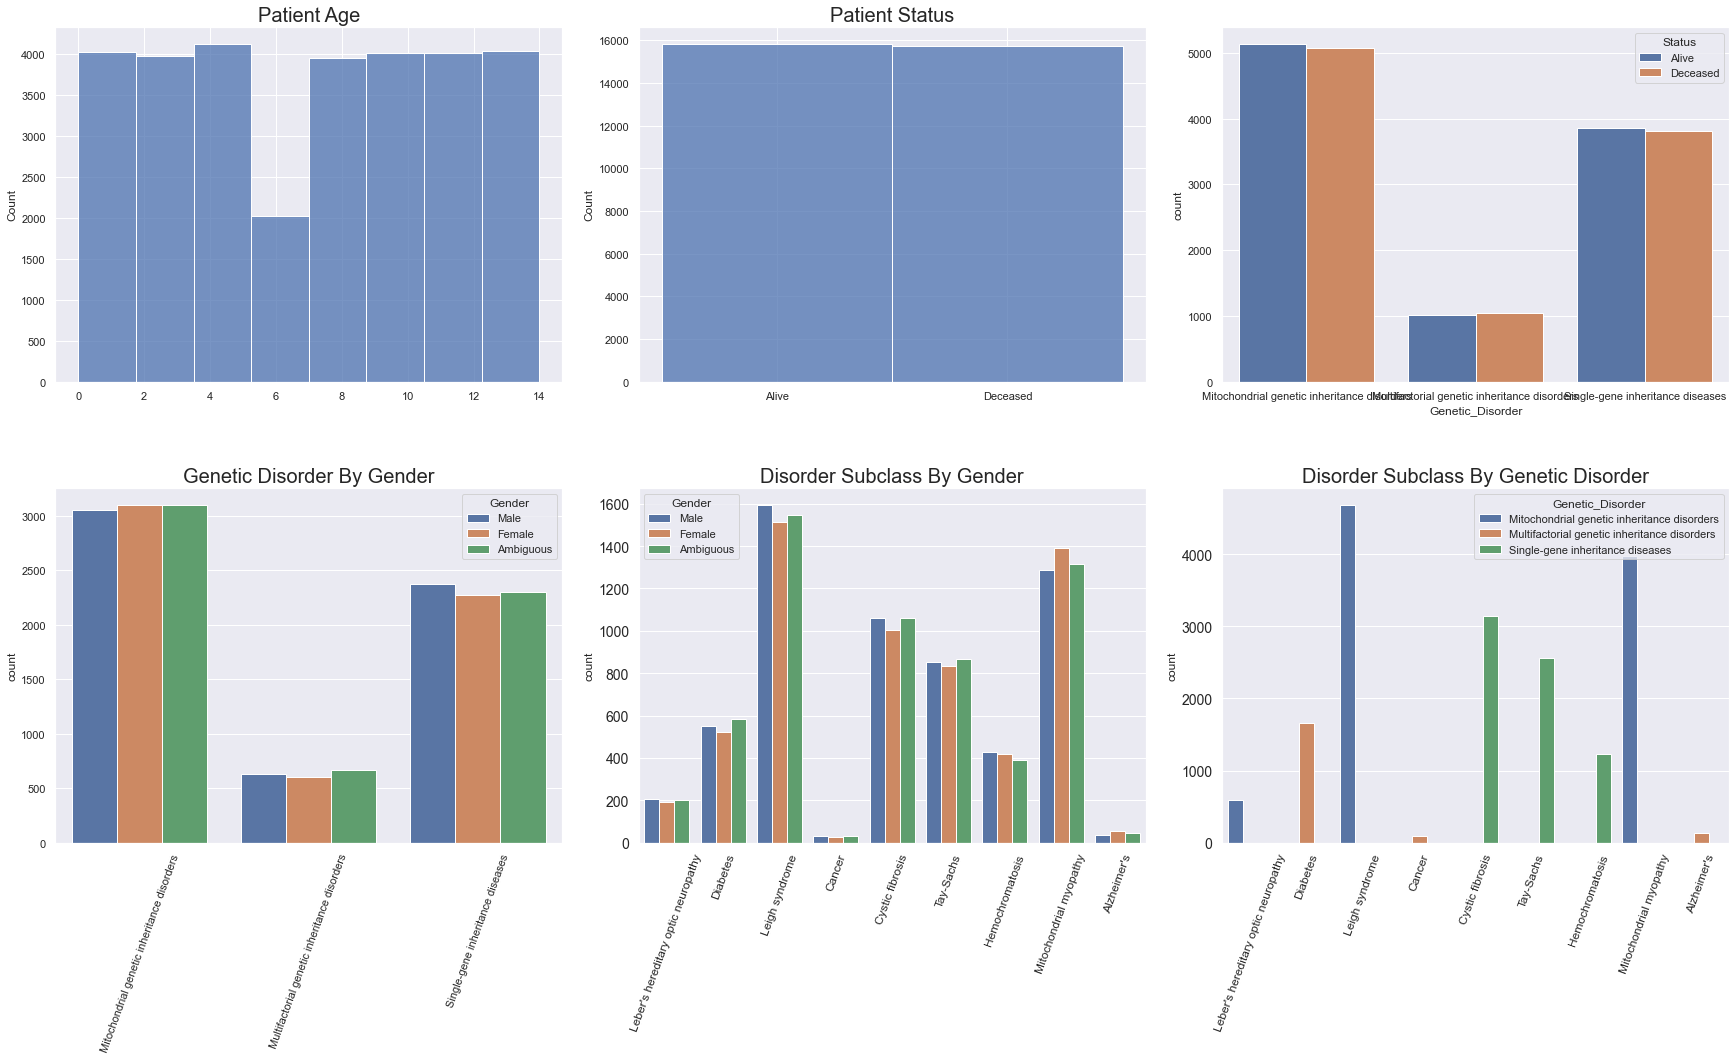

In [1408]:
fig, axes = plt.subplots(2, 3,figsize=(30,15))
fig.subplots_adjust(hspace=.3, wspace=0.15)
####################
sns.histplot(data=df, x='Patient_Age',ax=axes[0,0],bins=8)
# sns.countplot(data=features_df, x='Patient_Age',hue='Status',ax=axes[0,0],bins=8)
axes[0,0].set_title("Patient Age", fontsize = 20)
axes[0,0].set_xlabel("")
####################
sns.histplot(data=df, x='Status',ax=axes[0,1])
axes[0,1].set_title("Patient Status", fontsize = 20)
axes[0,1].set_xlabel("")
####################
sns.countplot(data=df, x='Genetic_Disorder',hue='Status',ax=axes[0,2])
axes[1,2].tick_params(axis='x', rotation=70)
axes[1,2].set_title("Genetic_Disorder By Gender", fontsize = 20)
axes[1,2].set_xlabel("")
####################
sns.countplot(data=df, x='Genetic_Disorder',hue='Gender',ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=70)
axes[1,0].set_title("Genetic Disorder By Gender", fontsize = 20)
axes[1,0].set_xlabel("")
####################
sns.countplot(data=df, x='Disorder_Subclass',hue='Gender',ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=70,labelsize=12)
axes[1,1].tick_params(axis='y',labelsize=14)
axes[1,1].set_title("Disorder Subclass By Gender", fontsize = 20)
axes[1,1].set_xlabel("")
####################
sns.countplot(data=df, x='Disorder_Subclass',hue='Genetic_Disorder',ax=axes[1,2])
axes[1,2].tick_params(axis='x', rotation=70,labelsize=12)
axes[1,2].tick_params(axis='y',labelsize=14)
axes[1,2].set_title("Disorder Subclass By Genetic Disorder", fontsize = 20)
axes[1,2].set_xlabel("")
####################
# sns.countplot(data=features_df, x=features_df['Gender'],ax=axes[3])


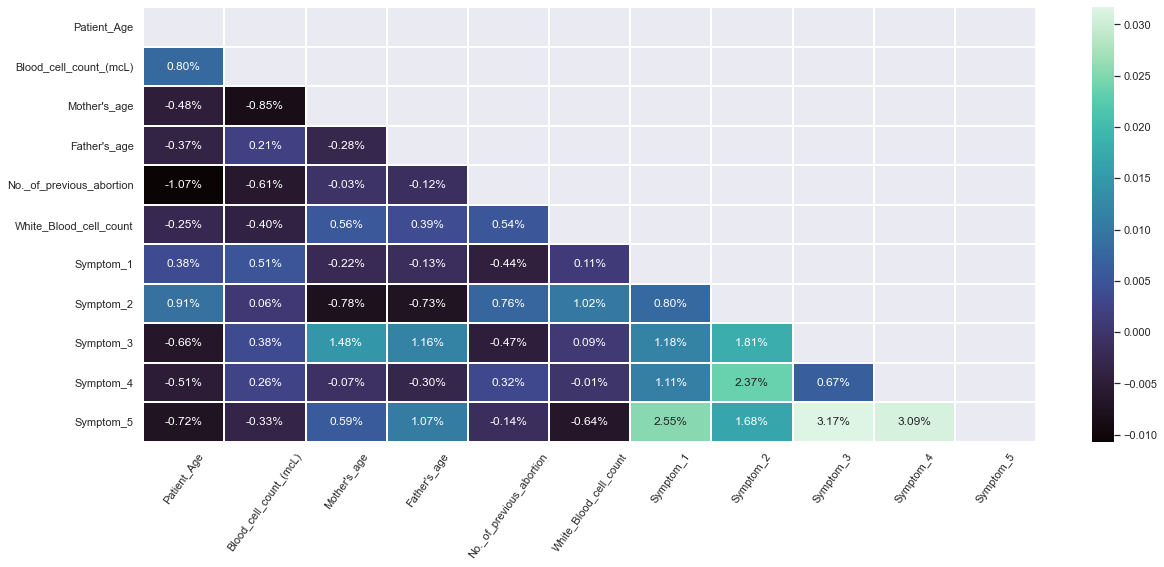

In [1409]:
#correlation 
corr = features_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,8))
plt.xticks(rotation=54)

fig=sns.heatmap(corr, mask = mask, annot=True,fmt = '.2%',linewidth=1,cmap="mako")
plt.show()

## Categorical Encoding 

In [1410]:
categorical_features.columns

Index(['mother's_Genes', 'Inherited_from_father', 'Maternal_gene',
       'Paternal_gene', 'Status', 'Respiratory_Rate', 'Heart_Rate',
       'Follow-up', 'Gender', 'Birth_asphyxia', 'birth_defect',
       'Place_of_birth', 'Folic_acid', 'H/O_serious_maternal_illness',
       'H/O_radiation_exposure_(x-ray)', 'H/O_substance_abuse',
       'Assisted_conception_IVF/ART', 'previous_pregnancies_anomalies',
       'Birth_defects', 'Blood_test_result'],
      dtype='object')

In [1411]:
for col in categorical_features:
    categorical_features_dummy=pd.get_dummies(features_df[col],drop_first=True,prefix=col+"dm")
    #   categorical_features_dummy
    features_df = pd.concat([features_df, categorical_features_dummy], axis=1)
    features_df.drop(col, axis=1, inplace=True)
features_df.head(5)

,Patient_Age,Blood_cell_count_(mcL),Mother's_age,Father's_age,No._of_previous_abortion,White_Blood_cell_count,Symptom_1,Symptom_2,Symptom_3,Symptom_4,...,H/O_radiation_exposure_(x-ray)dm_Yes,H/O_substance_abusedm_No,H/O_substance_abusedm_Not applicable,H/O_substance_abusedm_Yes,Assisted_conception_IVF/ARTdm_Yes,previous_pregnancies_anomaliesdm_Yes,Birth_defectsdm_Singular,Blood_test_resultdm_inconclusive,Blood_test_resultdm_normal,Blood_test_resultdm_slightly abnormal
0,2.0,4.760603,34.544646,41.920233,2.006852,9.857562,1.0,1.0,1.0,1.0,...,0,1,0,0,0,1,1,0,0,1
1,6.0,4.893297,41.000000,22.000000,4.000000,7.488568,0.0,1.0,1.0,1.0,...,1,1,0,0,1,1,1,0,1,0
2,12.0,4.705280,21.000000,41.920233,1.000000,7.919321,0.0,0.0,1.0,0.0,...,0,0,1,0,0,1,1,1,0,0
3,11.0,4.720703,32.000000,41.920233,4.000000,4.098210,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1
4,14.0,5.103188,34.544646,41.920233,0.000000,10.272230,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,1,0


In [1412]:
features_df.columns

Index(['Patient_Age', 'Blood_cell_count_(mcL)', 'Mother's_age', 'Father's_age',
       'No._of_previous_abortion', 'White_Blood_cell_count', 'Symptom_1',
       'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'mother's_Genesdm_Yes', 'Inherited_from_fatherdm_Yes',
       'Maternal_genedm_Yes', 'Paternal_genedm_Yes', 'Statusdm_Deceased',
       'Respiratory_Ratedm_Tachypnea', 'Heart_Ratedm_Tachycardia',
       'Follow-updm_Low', 'Genderdm_Female', 'Genderdm_Male',
       'Birth_asphyxiadm_No record', 'Birth_asphyxiadm_Not available',
       'Birth_asphyxiadm_Yes', 'birth_defectdm_None',
       'birth_defectdm_Not applicable', 'birth_defectdm_Yes',
       'Place_of_birthdm_Institute', 'Folic_aciddm_Yes',
       'H/O_serious_maternal_illnessdm_Yes',
       'H/O_radiation_exposure_(x-ray)dm_No',
       'H/O_radiation_exposure_(x-ray)dm_Not applicable',
       'H/O_radiation_exposure_(x-ray)dm_Yes', 'H/O_substance_abusedm_No',
       'H/O_substance_abusedm_Not applicable', 'H/O_su

In [1413]:
# drop observation with null-targets columns 
train_features_df=features_df[:18047]
train_features_df

,Patient_Age,Blood_cell_count_(mcL),Mother's_age,Father's_age,No._of_previous_abortion,White_Blood_cell_count,Symptom_1,Symptom_2,Symptom_3,Symptom_4,...,H/O_radiation_exposure_(x-ray)dm_Yes,H/O_substance_abusedm_No,H/O_substance_abusedm_Not applicable,H/O_substance_abusedm_Yes,Assisted_conception_IVF/ARTdm_Yes,previous_pregnancies_anomaliesdm_Yes,Birth_defectsdm_Singular,Blood_test_resultdm_inconclusive,Blood_test_resultdm_normal,Blood_test_resultdm_slightly abnormal
0,2.0,4.760603,34.544646,41.920233,2.006852,9.857562,1.000000,1.0,1.0,1.0,...,0,1,0,0,0,1,1,0,0,1
1,6.0,4.893297,41.000000,22.000000,4.000000,7.488568,0.000000,1.0,1.0,1.0,...,1,1,0,0,1,1,1,0,1,0
2,12.0,4.705280,21.000000,41.920233,1.000000,7.919321,0.000000,0.0,1.0,0.0,...,0,0,1,0,0,1,1,1,0,0
3,11.0,4.720703,32.000000,41.920233,4.000000,4.098210,0.000000,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,1
4,14.0,5.103188,34.544646,41.920233,0.000000,10.272230,1.000000,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,9.0,5.012599,47.000000,41.920233,2.006852,12.000000,0.621679,1.0,0.0,0.0,...,0,0,1,0,1,1,1,0,0,1
18043,4.0,5.258298,35.000000,64.000000,3.000000,6.584811,0.000000,0.0,1.0,0.0,...,0,1,0,0,1,0,0,1,0,0
18044,8.0,4.974220,34.544646,56.000000,2.000000,7.041556,1.000000,1.0,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
18045,8.0,5.186470,35.000000,51.000000,2.000000,7.715464,0.000000,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,1,0


In [1414]:
predict_df_features=features_df[18047:]
predict_df_features

,Patient_Age,Blood_cell_count_(mcL),Mother's_age,Father's_age,No._of_previous_abortion,White_Blood_cell_count,Symptom_1,Symptom_2,Symptom_3,Symptom_4,...,H/O_radiation_exposure_(x-ray)dm_Yes,H/O_substance_abusedm_No,H/O_substance_abusedm_Not applicable,H/O_substance_abusedm_Yes,Assisted_conception_IVF/ARTdm_Yes,previous_pregnancies_anomaliesdm_Yes,Birth_defectsdm_Singular,Blood_test_resultdm_inconclusive,Blood_test_resultdm_normal,Blood_test_resultdm_slightly abnormal
18047,6.000000,4.981655,38.000000,61.000000,2.000000,7.488568,1.000000,1.0,1.0,1.0,...,1,0,0,0,0,1,0,0,0,1
18048,10.000000,5.118890,33.000000,53.000000,2.006852,8.179584,0.000000,0.0,0.0,1.0,...,0,1,0,0,0,1,0,0,1,0
18049,5.000000,4.876204,48.000000,60.000000,0.000000,7.488568,0.000000,0.0,1.0,1.0,...,1,0,0,1,1,0,1,0,0,1
18050,13.000000,4.687767,25.000000,55.000000,2.006852,6.884071,1.000000,0.0,1.0,0.0,...,0,1,0,0,0,1,1,0,1,0
18051,5.000000,5.152362,41.000000,38.000000,2.006852,6.195178,1.000000,1.0,1.0,1.0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31543,6.995418,4.664764,42.000000,30.000000,4.000000,7.488568,0.000000,0.0,0.0,0.0,...,0,1,0,0,0,1,1,0,1,0
31544,1.000000,4.516767,34.544646,42.000000,2.000000,7.488568,0.621679,1.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,1
31545,3.000000,4.671013,40.000000,39.000000,4.000000,4.967410,0.000000,1.0,1.0,1.0,...,0,0,1,0,0,1,0,1,0,0
31546,13.000000,4.874635,44.000000,62.000000,1.000000,7.488568,0.000000,0.0,0.0,1.0,...,0,1,0,0,1,0,1,0,1,0


## Split dataframe into Train/Test dataset

##### HERE IT'S LIST OF DATASETS AVALIABLE WITH DESCRIPTION
1. "train_features_df" ---> contain model-ready-fit features FOR TRAINING
2. "targets_df"             ---> contain model-ready targets FOR TRAINING
3. "predict_df_features"  ---> contain model-ready features FOR PREDICT


In [1415]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features_df,targets_df,test_size=0.2)

In [1416]:
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)
print("x_test :",x_test.shape)
print("y_test :",y_test.shape)

x_train : (14437, 42)
y_train : (14437, 2)
x_test : (3610, 42)
y_test : (3610, 2)


## Model

In [1417]:
targets_df.isnull().sum()

Genetic_Disorder     0
Disorder_Subclass    0
dtype: int64

In [1418]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [1419]:
model.fit(train_features_df,targets_df)

DecisionTreeClassifier()

In [1420]:
model.score(x_test,y_test)

ValueError: multiclass-multioutput is not supported